In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (datasets, naive_bayes, neighbors, neural_network, model_selection)

In [2]:
filename = "C:\\Users\\jakes\\x_train.txt"
S_in = np.loadtxt(filename, delimiter=',')
temp = S_in

filename = "C:\\Users\\jakes\\y_train.txt"
S_inY = np.loadtxt(filename, delimiter=',')
tempY = S_inY

In [3]:
filename = "C:\\Users\\jakes\\S_val.txt"
S_val = np.loadtxt(filename, delimiter=',')
tempV = S_val

filename = "C:\\Users\\jakes\\S_valY.txt"
S_valY = np.loadtxt(filename, delimiter=',')
tempVY = S_valY

### Normalizing

In [4]:
[N,dim]=np.shape(S_in)

S_in = temp
S_inY = tempY

S_val = tempV
S_valY = tempVY

for i in range(dim):
    mean = np.mean(S_in[:,i])
    S_in[:,i] = S_in[:,i] - mean
    
    std = np.std(S_in[:,i])
    S_in[:,i] = S_in[:,i] / std

    S_val[:,i] = S_val[:,i] - mean
    S_val[:,i] = S_val[:,i] / std

## First CNN Model - finding the best lambda

In [5]:
#Reshaping data

S_trainR = S_in
S_valR = S_val

S_trainR = np.reshape(S_in, (len(S_in), 32,32,3))
S_valR = np.reshape(S_val, (len(S_val), 32,32,3))

### Using lambda = 1e-4

In [6]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-4)),
    tf.keras.layers.Dense(10),
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7386 - accuracy: 0.4697 - val_loss: 208.7075 - val_accuracy: 0.3777
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3359 - accuracy: 0.6168 - val_loss: 283.9081 - val_accuracy: 0.3457
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1868 - accuracy: 0.6763 - val_loss: 162.6864 - val_accuracy: 0.4595
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0982 - accuracy: 0.7119 - val_loss: 256.3727 - val_accuracy: 0.4201
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0431 - accuracy: 0.7346 - val_loss: 249.9750 - val_accuracy: 0.3931
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0037 - accuracy: 0.7527 - val_loss: 181.7593 - val_accuracy: 0.4473
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9670 - accuracy: 0.7665 - val_lo

In [7]:
model1acc = history.history['accuracy']
model1valAcc = history.history['val_accuracy']
model1valLoss = history.history['val_loss']

### Using lambda = 1e-3

In [8]:
model1a = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-3)),
    tf.keras.layers.Dense(10),
])

model1a.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1a.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3449 - accuracy: 0.3471 - val_loss: 309.0828 - val_accuracy: 0.2748
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.7774 - accuracy: 0.4485 - val_loss: 464.7816 - val_accuracy: 0.2183
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6655 - accuracy: 0.4884 - val_loss: 288.3275 - val_accuracy: 0.3132
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5912 - accuracy: 0.5164 - val_loss: 304.2397 - val_accuracy: 0.3334
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5506 - accuracy: 0.5327 - val_loss: 337.7850 - val_accuracy: 0.3075
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5211 - accuracy: 0.5405 - val_loss: 268.4666 - val_accuracy: 0.3542
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4957 - accuracy: 0.5519 - val_lo

In [9]:
model1aacc = history.history['accuracy']
model1avalAcc = history.history['val_accuracy']
model1avalLoss = history.history['val_loss']

### Using lambda = 1e-2

In [10]:
model1b = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.Dense(10),
])

model1b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1b.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 3.9394 - accuracy: 0.0971 - val_loss: 2.5080 - val_accuracy: 0.1034
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.5091 - accuracy: 0.0979 - val_loss: 2.5088 - val_accuracy: 0.1007
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.5092 - accuracy: 0.0984 - val_loss: 2.5087 - val_accuracy: 0.1034
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.5092 - accuracy: 0.0975 - val_loss: 2.5097 - val_accuracy: 0.1029
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.5091 - accuracy: 0.0999 - val_loss: 2.5094 - val_accuracy: 0.1029
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2.5091 - accuracy: 0.0969 - val_loss: 2.5093 - val_accuracy: 0.1009
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.5091 - accuracy: 0.0964 - val_loss: 2.5083 -

In [11]:
model1bacc = history.history['accuracy']
model1bvalAcc = history.history['val_accuracy']
model1bvalLoss = history.history['val_loss']

### Using lambda = 1e-5

In [12]:
model1c = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-2)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-5)),
    tf.keras.layers.Dense(10),
])

model1c.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1c.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6617 - accuracy: 0.4524 - val_loss: 250.1825 - val_accuracy: 0.3569
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.2529 - accuracy: 0.6019 - val_loss: 319.0127 - val_accuracy: 0.3001
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0885 - accuracy: 0.6656 - val_loss: 187.5896 - val_accuracy: 0.4203
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9901 - accuracy: 0.7004 - val_loss: 311.6383 - val_accuracy: 0.3503
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9140 - accuracy: 0.7309 - val_loss: 192.1119 - val_accuracy: 0.4454
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8557 - accuracy: 0.7517 - val_loss: 186.7861 - val_accuracy: 0.4369
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8108 - accuracy: 0.7691 - val_lo

In [13]:
model1cacc = history.history['accuracy']
model1cvalAcc = history.history['val_accuracy']
model1cvalLoss = history.history['val_loss']

### Using lambda = 1e-1

In [14]:
model1d = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-1)),
    tf.keras.layers.Dense(10),
])

model1d.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1d.fit(S_trainR, S_inY, epochs=10,
                   validation_data=(S_valR, S_valY))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 18.4514 - accuracy: 0.0976 - val_loss: 4.3665 - val_accuracy: 0.0974
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 4.3735 - accuracy: 0.0976 - val_loss: 4.3861 - val_accuracy: 0.0993
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.3734 - accuracy: 0.0980 - val_loss: 4.3606 - val_accuracy: 0.1029
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.3732 - accuracy: 0.0991 - val_loss: 4.3879 - val_accuracy: 0.0963
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.3733 - accuracy: 0.0970 - val_loss: 4.3808 - val_accuracy: 0.0963
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.3731 - accuracy: 0.0980 - val_loss: 4.3763 - val_accuracy: 0.1029
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 4.3730 - accuracy: 0.0985 - val_loss: 4.3584 

In [15]:
model1dacc = history.history['accuracy']
model1dvalAcc = history.history['val_accuracy']
model1dvalLoss = history.history['val_loss']

### Using lamda = 1e-6

In [27]:
model1e = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-6)),
    tf.keras.layers.Dense(10),
])

model1e.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1e.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 20s 12ms/step - loss: 1.4106 - accuracy: 0.4932 - val_loss: 177.4119 - val_accuracy: 0.4647
Epoch 2/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0178 - accuracy: 0.6450 - val_loss: 250.9012 - val_accuracy: 0.3977
Epoch 3/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8518 - accuracy: 0.7064 - val_loss: 217.1650 - val_accuracy: 0.4478
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7430 - accuracy: 0.7434 - val_loss: 219.0708 - val_accuracy: 0.4147
Epoch 5/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6618 - accuracy: 0.7721 - val_loss: 331.7968 - val_accuracy: 0.3856
Epoch 6/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5924 - accuracy: 0.7960 - val_loss: 200.5786 - val_accuracy: 0.4759
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5361 - accuracy: 0.8150 - val_lo

In [28]:
model1eacc = history.history['accuracy']
model1evalAcc = history.history['val_accuracy']
model1evalLoss = history.history['val_loss']

### Using lamda = 1e-7

In [29]:
model1f = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(10),
])

model1f.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1f.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4139 - accuracy: 0.4887 - val_loss: 165.8076 - val_accuracy: 0.4547
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0182 - accuracy: 0.6409 - val_loss: 249.2511 - val_accuracy: 0.3941
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8398 - accuracy: 0.7066 - val_loss: 151.5502 - val_accuracy: 0.4696
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7362 - accuracy: 0.7436 - val_loss: 112.7029 - val_accuracy: 0.5419
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6510 - accuracy: 0.7733 - val_loss: 291.9010 - val_accuracy: 0.4015
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5820 - accuracy: 0.7963 - val_loss: 164.4616 - val_accuracy: 0.5157
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5247 - accuracy: 0.8156 - val_lo

In [30]:
model1facc = history.history['accuracy']
model1fvalAcc = history.history['val_accuracy']
model1fvalLoss = history.history['val_loss']

### Using lamda = 1e-8

In [31]:
model1g = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-8)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-7)),
    tf.keras.layers.Dense(10),
])

model1g.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1g.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4116 - accuracy: 0.4873 - val_loss: 260.3453 - val_accuracy: 0.3717
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0058 - accuracy: 0.6469 - val_loss: 186.5461 - val_accuracy: 0.4901
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8340 - accuracy: 0.7083 - val_loss: 179.1706 - val_accuracy: 0.5005
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7313 - accuracy: 0.7435 - val_loss: 310.3327 - val_accuracy: 0.4255
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6535 - accuracy: 0.7715 - val_loss: 258.2090 - val_accuracy: 0.4656
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5855 - accuracy: 0.7941 - val_loss: 285.7307 - val_accuracy: 0.4238
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5268 - accuracy: 0.8147 - val_lo

In [32]:
model1gacc = history.history['accuracy']
model1gvalAcc = history.history['val_accuracy']
model1gvalLoss = history.history['val_loss']

### Using lamda = 1e-9

In [33]:
model1h = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-9)),
    tf.keras.layers.Dense(10),
])

model1h.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1h.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3834 - accuracy: 0.5006 - val_loss: 235.5922 - val_accuracy: 0.4033
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9922 - accuracy: 0.6530 - val_loss: 254.4062 - val_accuracy: 0.4243
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8198 - accuracy: 0.7135 - val_loss: 195.4900 - val_accuracy: 0.4129
Epoch 4/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7109 - accuracy: 0.7516 - val_loss: 207.5654 - val_accuracy: 0.4841
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6279 - accuracy: 0.7807 - val_loss: 360.2607 - val_accuracy: 0.4028
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5576 - accuracy: 0.8049 - val_loss: 333.7048 - val_accuracy: 0.4293
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4960 - accuracy: 0.8275 - val_lo

In [35]:
model1hacc = history.history['accuracy']
model1hvalAcc = history.history['val_accuracy']
model1hvalLoss = history.history['val_loss']

### Using lamda = 1e-10

In [38]:
model1i = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=1e-10)),
    tf.keras.layers.Dense(10),
])

model1i.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1i.fit(S_trainR, S_inY, epochs=20,
                   validation_data=(S_valR, S_valY))

Epoch 1/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4060 - accuracy: 0.4929 - val_loss: 225.4757 - val_accuracy: 0.3822
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0028 - accuracy: 0.6483 - val_loss: 347.8338 - val_accuracy: 0.3242
Epoch 3/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8309 - accuracy: 0.7109 - val_loss: 154.4052 - val_accuracy: 0.4915
Epoch 4/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7160 - accuracy: 0.7500 - val_loss: 223.6871 - val_accuracy: 0.4433
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6297 - accuracy: 0.7791 - val_loss: 159.1633 - val_accuracy: 0.5036
Epoch 6/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5544 - accuracy: 0.8069 - val_loss: 194.3634 - val_accuracy: 0.4801
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4893 - accuracy: 0.8280 - val_lo

In [43]:
model1iacc = history.history['accuracy']
model1ivalAcc = history.history['val_accuracy']
model1ivalLoss = history.history['val_loss']

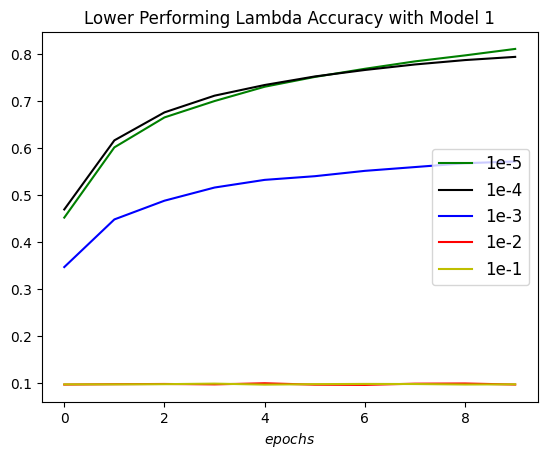

In [41]:
f, ax=plt.subplots()
ax.title.set_text("Lower Performing Lambda Accuracy with Model 1")
ax.plot(model1cacc, label="1e-5", color='g')
ax.plot(model1acc, label="1e-4", color='k')
ax.plot(model1aacc, label="1e-3", color='b')
ax.plot(model1bacc, label="1e-2", color='r')
ax.plot(model1dacc, label="1e-1", color='y')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)

Max mean accuracy is 0.8420030057430268 from model 3


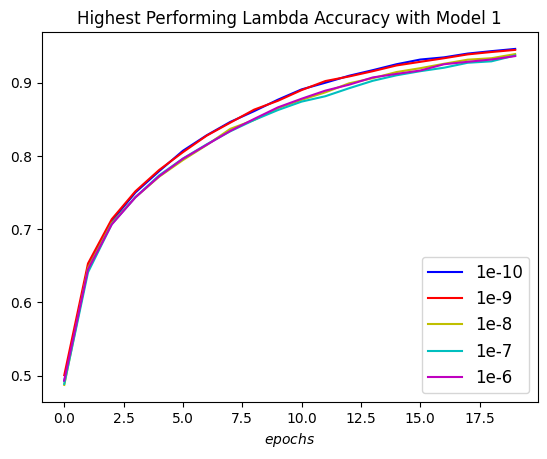

In [69]:
means = [np.mean(model1eacc), np.mean(model1facc), np.mean(model1gacc), np.mean(model1hacc), np.mean(model1iacc)]

f, ax=plt.subplots()
ax.title.set_text("Highest Performing Lambda Accuracy with Model 1")
ax.plot(model1iacc, label="1e-10", color='b')
ax.plot(model1hacc, label="1e-9", color='r')
ax.plot(model1gacc, label="1e-8", color='y')
ax.plot(model1facc, label="1e-7", color='c')
ax.plot(model1eacc, label="1e-6", color='m')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)


print("Max mean accuracy is",max(means),"from model", means.index(max(means)))

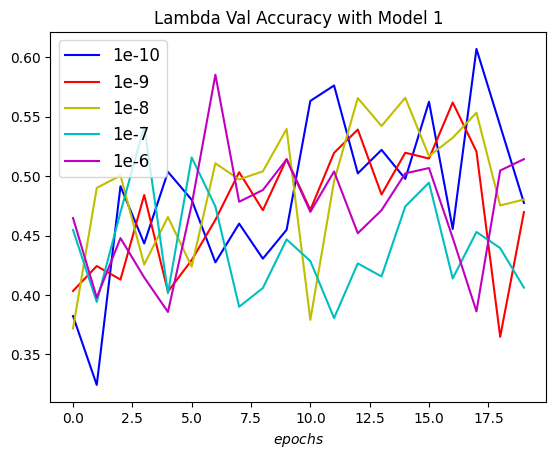

In [71]:
f, ax=plt.subplots()
ax.title.set_text("Lambda Val Accuracy with Model 1")
ax.plot(model1ivalAcc, label="1e-10", color='b')
ax.plot(model1hvalAcc, label="1e-9", color='r')
ax.plot(model1gvalAcc, label="1e-8", color='y')
ax.plot(model1fvalAcc, label="1e-7", color='c')
ax.plot(model1evalAcc, label="1e-6", color='m')
ax.set_xlabel("$epochs$")
ax.legend(fontsize=12)